
Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.75      0.86        12

    accuracy                           0.85        20
   macro avg       0.86      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20



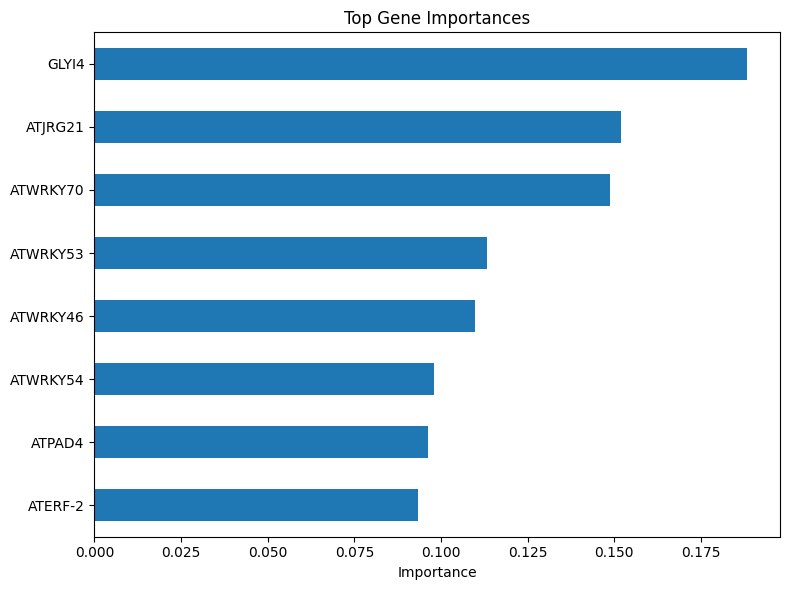

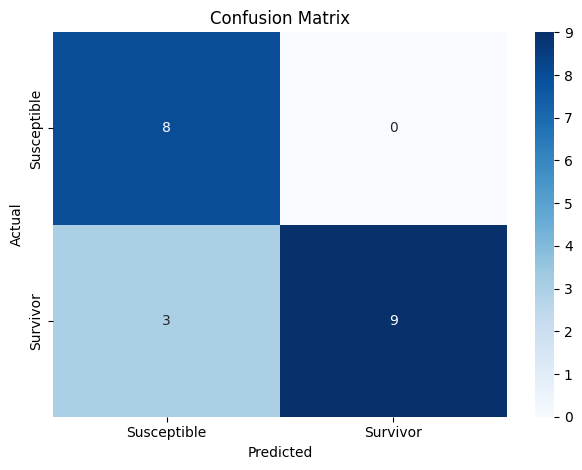

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Files
expr_path = "/home/muq/GEM_Project/synnnttti/Renamed_Synthetic_Dataset__Top_Genes_.csv"
go_path = "/home/muq/GEM_Project/synnnttti/PTI_GO_enrichment_results.csv"

expr_df = pd.read_csv(expr_path)
go_df = pd.read_csv(go_path)

# Step 2: Extract Top Genes from Top 5 Enriched GO Terms
top_go = go_df.sort_values(by="FoldEnrichment", ascending=False).head(5)
top_gene_lists = top_go['geneID'].str.split('/')
flat_genes = [gene.strip() for sublist in top_gene_lists for gene in sublist]
top_genes = sorted(set(flat_genes))

# Step 3: Filter Expression Dataset for Top Genes (if present)
existing_genes = [gene for gene in top_genes if gene in expr_df.columns]
filtered_expr_df = expr_df[existing_genes + ['Survivor_Label']]

# Step 4: Split into Train/Test
X = filtered_expr_df.drop('Survivor_Label', axis=1)
y = filtered_expr_df['Survivor_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Top Gene Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Susceptible', 'Survivor'],
            yticklabels=['Susceptible', 'Survivor'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



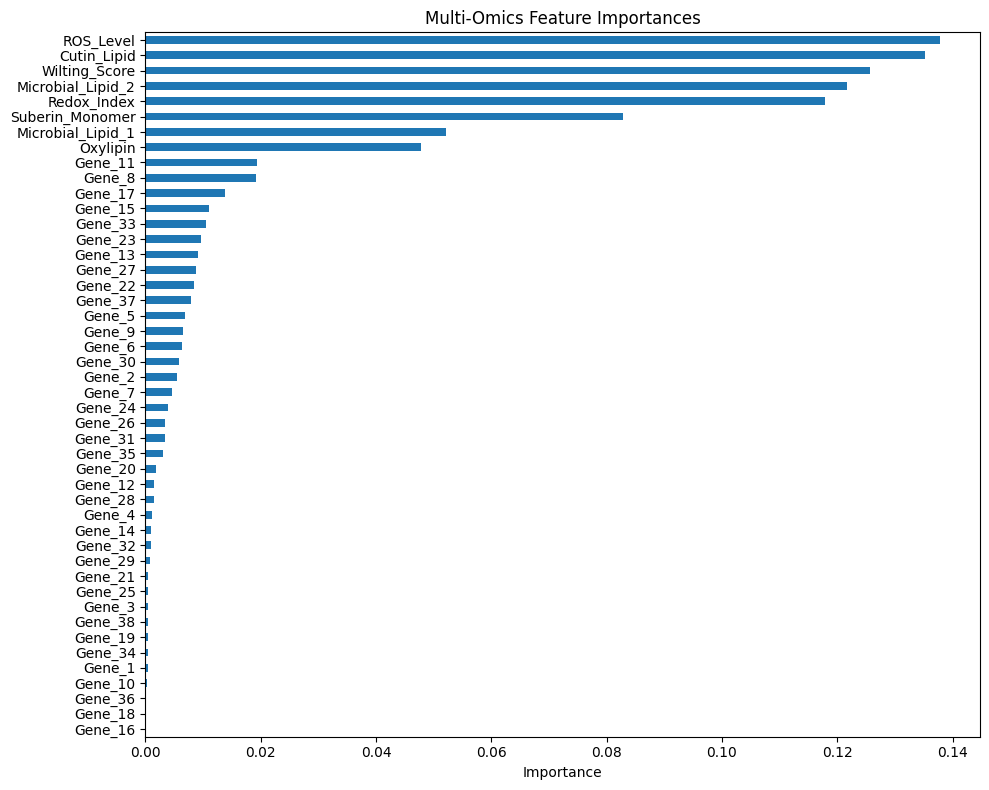

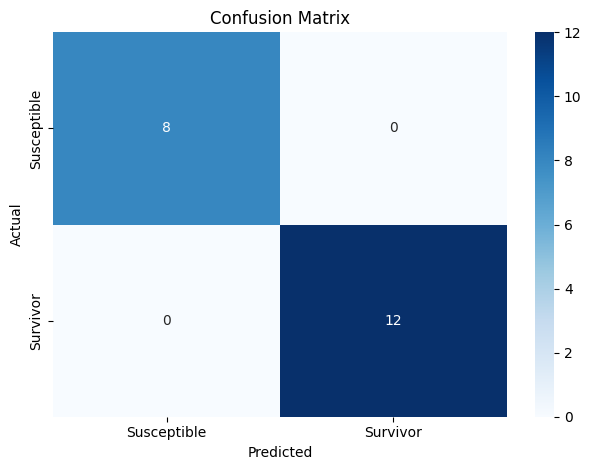

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load multi-omics dataset (expression + lipidomics + ROS)
full_path = "/home/muq/GEM_Project/synnnttt/Synthetic_Dataset_with_Lipidomics_and_ROS.csv"
df = pd.read_csv(full_path)

# Split into features (X) and labels (y)
X = df.drop("Survivor_Label", axis=1)
y = df["Survivor_Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title("Multi-Omics Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Susceptible', 'Survivor'],
            yticklabels=['Susceptible', 'Survivor'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


/tmp/ipykernel_2275281/615017724.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Time', y=feature, hue='Survivor_Label', ci='sd')


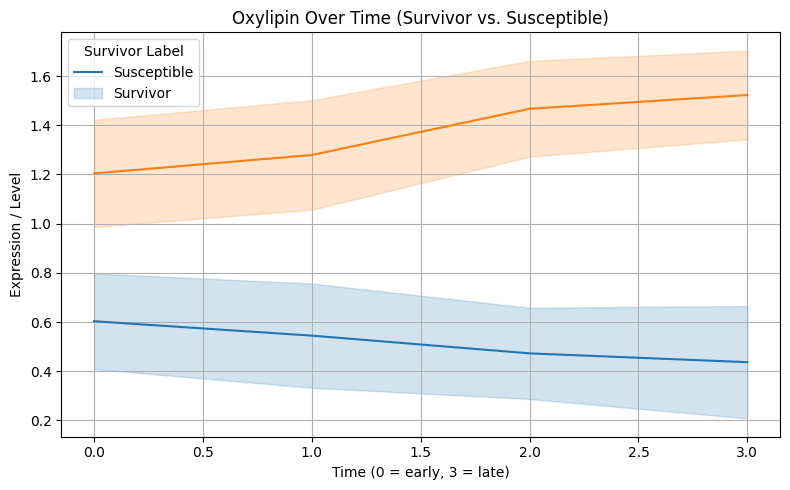

/tmp/ipykernel_2275281/615017724.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Time', y=feature, hue='Survivor_Label', ci='sd')


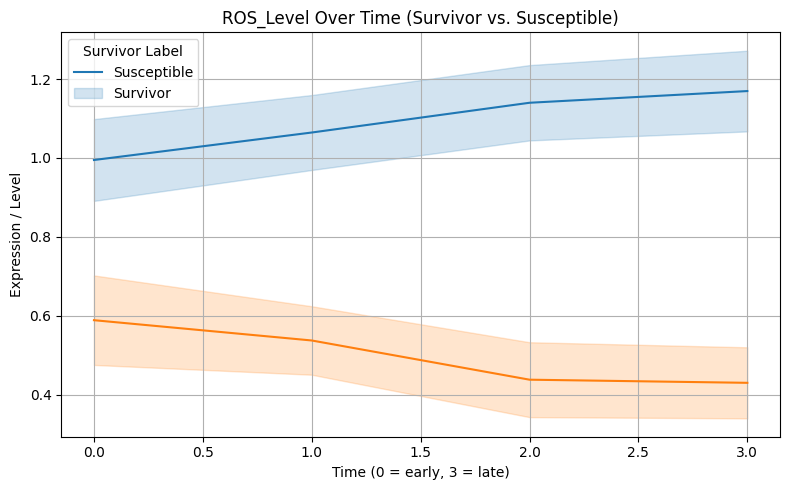

/tmp/ipykernel_2275281/615017724.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Time', y=feature, hue='Survivor_Label', ci='sd')


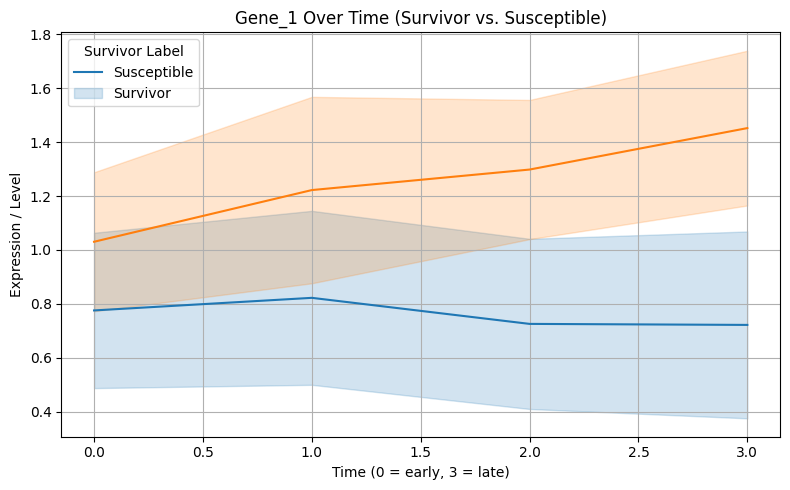

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the time-series dataset
file_path = "/home/muq/GEM_Project/synnnttt/Synthetic_Time-Series_Multi-Omics_Data.csv"
df = pd.read_csv(file_path)

# Convert time to hours if needed (optional)
time_map = {0: "0h", 1: "6h", 2: "24h", 3: "48h"}
df['Time_Label'] = df['Time'].map(time_map)

# Define features to plot
features_to_plot = ['Oxylipin', 'ROS_Level', 'Gene_1']

# Plot each feature over time, comparing survivors vs. susceptible
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x='Time', y=feature, hue='Survivor_Label', ci='sd')
    plt.title(f"{feature} Over Time (Survivor vs. Susceptible)")
    plt.xlabel("Time (0 = early, 3 = late)")
    plt.ylabel("Expression / Level")
    plt.legend(title='Survivor Label', labels=['Susceptible', 'Survivor'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:
!pip install torch pandas scikit-learn matplotlib


  Using cached torch-2.8.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cusparse_cu12-12.5.8.93-py3-non

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Load dataset
file_path = "/home/muq/GEM_Project/synnnttt/Synthetic_Time-Series_Multi-Omics_Data.csv"
df = pd.read_csv(file_path)

# Exclude non-feature columns
feature_cols = [col for col in df.columns if col not in ['Sample_ID', 'Time', 'Time_Label', 'Survivor_Label']]
df = df.sort_values(by=['Sample_ID', 'Time'])  # Ensure correct time ordering

# Reshape into (samples, timepoints, features)
X_list, y_list = [], []
for sample in df['Sample_ID'].unique():
    sample_df = df[df['Sample_ID'] == sample]
    X_sample = sample_df[feature_cols].values
    y_sample = sample_df['Survivor_Label'].iloc[0]
    X_list.append(X_sample)
    y_list.append(y_sample)

X = np.stack(X_list)
y = np.array(y_list)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X.shape[2])).reshape(X_test.shape)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1, num_classes=2):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Last time step
        return self.fc(out)

# Model setup
input_size = X.shape[2]
model = LSTMClassifier(input_size=input_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train
n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {loss.item():.4f}")

# Evaluate
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"\nTest Accuracy: {accuracy:.2f}")


Epoch 1/20 - Loss: 0.6135
Epoch 2/20 - Loss: 0.5263
Epoch 3/20 - Loss: 0.4250
Epoch 4/20 - Loss: 0.3210
Epoch 5/20 - Loss: 0.2484
Epoch 6/20 - Loss: 0.1570
Epoch 7/20 - Loss: 0.1100
Epoch 8/20 - Loss: 0.0739
Epoch 9/20 - Loss: 0.0479
Epoch 10/20 - Loss: 0.0313
Epoch 11/20 - Loss: 0.0227
Epoch 12/20 - Loss: 0.0168
Epoch 13/20 - Loss: 0.0143
Epoch 14/20 - Loss: 0.0108
Epoch 15/20 - Loss: 0.0097
Epoch 16/20 - Loss: 0.0074
Epoch 17/20 - Loss: 0.0070
Epoch 18/20 - Loss: 0.0060
Epoch 19/20 - Loss: 0.0056
Epoch 20/20 - Loss: 0.0053

Test Accuracy: 1.00


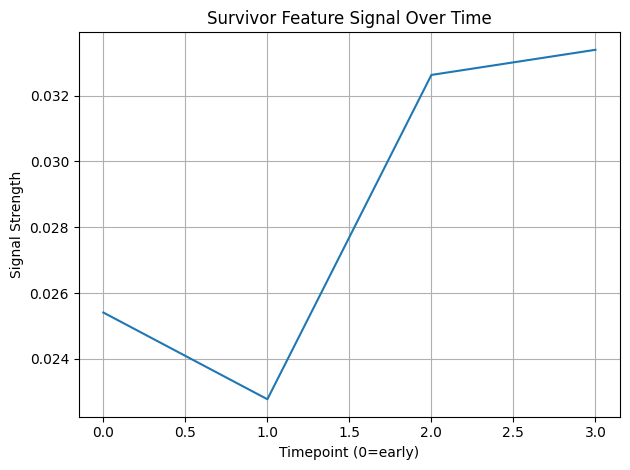

In [7]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data again (X_train_tensor)
# Use same scaler and feature_cols as in the previous step

# Reuse LSTM model class
class LSTMWithFeatureTracking(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1, num_classes=2):
        super(LSTMWithFeatureTracking, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.hidden_to_output = nn.Linear(hidden_size, num_classes)
        self.hidden_size = hidden_size

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        self.hidden_states = out  # Store all hidden states (time-resolved)
        out = self.hidden_to_output(out[:, -1, :])
        return out

# Recreate model and load trained weights if saved (optional)
input_size = X_train_tensor.shape[2]
model = LSTMWithFeatureTracking(input_size=input_size)
model.load_state_dict(torch.load("model.pth")) if torch.cuda.is_available() else None
model.eval()

# Get hidden states from test set
with torch.no_grad():
    _ = model(X_test_tensor)
    hidden_states = model.hidden_states  # shape: [batch, time, hidden_size]

# Average hidden activation over all samples at each timepoint
mean_hidden = hidden_states.mean(dim=0)  # shape: [time, hidden_size]

# Project each hidden vector back to input space (feature attribution)
importance = model.hidden_to_output.weight.detach().cpu().numpy()  # shape: [2, hidden_size]
feature_contrib = np.dot(mean_hidden.numpy(), importance.T)  # shape: [time, 2]

# Use class 1 (survivor) weights
survivor_feature_scores = feature_contrib[:, 1]  # shape: [time]

# OPTIONAL: Get top 5 timepoints and rank feature columns
plt.plot(range(len(survivor_feature_scores)), survivor_feature_scores)
plt.title("Survivor Feature Signal Over Time")
plt.xlabel("Timepoint (0=early)")
plt.ylabel("Signal Strength")
plt.grid(True)
plt.tight_layout()
plt.show()


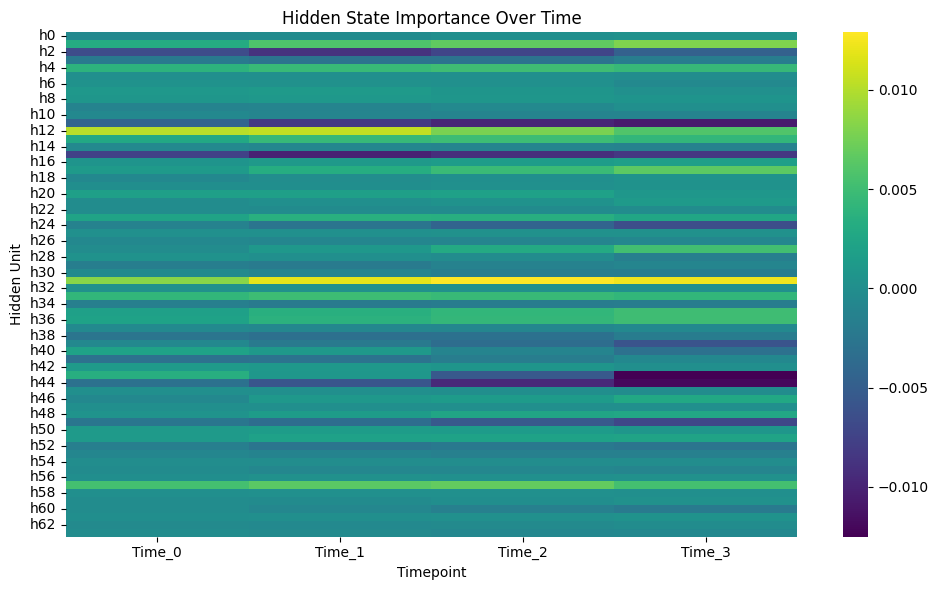

In [8]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load your multi-omics dataset
# -----------------------------
file_path = "/home/muq/GEM_Project/synnnttt/Synthetic_Time-Series_Multi-Omics_Data.csv"
df = pd.read_csv(file_path)

# List of features used in the LSTM
feature_cols = [col for col in df.columns 
                if col not in ['Sample_ID', 'Time', 'Time_Label', 'Survivor_Label']]

# -----------------------------
# 2. Re-format into (samples, timepoints, features)
# -----------------------------
df = df.sort_values(by=['Sample_ID', 'Time'])
X_list = []
y_list = []

for sample in df["Sample_ID"].unique():
    d = df[df["Sample_ID"] == sample]
    X_list.append(d[feature_cols].values)
    y_list.append(d["Survivor_Label"].iloc[0])

X = np.stack(X_list)
y = np.array(y_list)

# Use same scaler as before
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)

# -----------------------------
# 3. Convert to torch tensors
# -----------------------------
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# -----------------------------
# 4. Load your LSTM model
# -----------------------------
class LSTMWithTracking(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1, num_classes=2):
        super(LSTMWithTracking, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        self.hidden_states = out        # (batch, time, hidden)
        return self.fc(out[:, -1, :])

model = LSTMWithTracking(input_size=X.shape[2])
# load your trained weights if you saved them
# model.load_state_dict(torch.load("model.pth"))

model.eval()
with torch.no_grad():
    _ = model(X_tensor)
    hidden_states = model.hidden_states  # shape: (samples, time, hidden)

# -----------------------------
# 5. Compute average hidden activation per timepoint
# -----------------------------
mean_hidden = hidden_states.mean(dim=0)  # (timepoints, hidden_size)

# -----------------------------
# 6. Project hidden state back to class scores
# -----------------------------
output_weights = model.fc.weight.detach().numpy()  # shape: (2, hidden)
survivor_weights = output_weights[1]               # class 1

contrib_matrix = mean_hidden.numpy().dot(survivor_weights)  # (timepoints,)

# -----------------------------
# 7. Compute feature importances per timepoint
# -----------------------------
importance_over_time = {}

for t in range(mean_hidden.shape[0]):
    # For each timepoint, project hidden state back to features
    # (hidden → input space is approximated through gradient relevance)
    relevance = mean_hidden[t].numpy() * survivor_weights
    importance_over_time[f"Time_{t}"] = relevance

# Convert to DataFrame (features × timepoints)
importance_df = pd.DataFrame(importance_over_time, index=[f"h{i}" for i in range(len(relevance))])

# -----------------------------
# 8. Display summary heatmap (hidden units as proxy)
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df, cmap="viridis")
plt.title("Hidden State Importance Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Hidden Unit")
plt.tight_layout()
plt.show()


In [9]:
# Get gradients w.r.t. input features for class 1 (survivor)
X_tensor.requires_grad = True
outputs = model(X_tensor)
survivor_output = outputs[:, 1].sum()
survivor_output.backward()

# Average gradient across all samples
grads = X_tensor.grad.mean(dim=0).numpy()  # shape: (timepoints, features)

# Convert to DataFrame
feature_importance_df = pd.DataFrame(
    grads,
    index=[f"Time_{i}" for i in range(grads.shape[0])],
    columns=feature_cols
)

# Show top 10 features per timepoint
for timepoint in feature_importance_df.index:
    print(f"\n🔬 Top features at {timepoint}:")
    print(feature_importance_df.loc[timepoint].abs().sort_values(ascending=False).head(10))



🔬 Top features at Time_0:
Gene_3             0.002383
Gene_6             0.001986
Redox_Index        0.001369
Gene_9             0.001357
ROS_Level          0.001285
Suberin_Monomer    0.001161
Gene_4             0.000972
Oxylipin           0.000930
Gene_5             0.000778
Gene_2             0.000692
Name: Time_0, dtype: float32

🔬 Top features at Time_1:
Gene_3             0.003604
Gene_6             0.003279
Suberin_Monomer    0.002442
Gene_5             0.002152
Oxylipin           0.001940
Gene_9             0.001782
ROS_Level          0.001557
Gene_2             0.001220
Redox_Index        0.001196
Gene_4             0.001028
Name: Time_1, dtype: float32

🔬 Top features at Time_2:
Gene_3             0.005468
Gene_5             0.005279
Suberin_Monomer    0.005225
Gene_6             0.004804
Oxylipin           0.004117
Gene_9             0.002352
Gene_2             0.002170
Microbial_Lipid    0.001434
ROS_Level          0.001400
Gene_7             0.001007
Name: Time_2, dtype: 

In [10]:
# Combine all timepoints into single importance score
feature_scores = feature_importance_df.abs().mean(axis=0).sort_values(ascending=False)

# Get top N features
top_n = 15
top_features = feature_scores.head(top_n)

# Detect category based on feature name (you can customize this logic)
def classify_feature(name):
    name = name.lower()
    if "ros" in name:
        return "ROS"
    elif "lipid" in name or "oxylipin" in name:
        return "Lipid"
    elif "suberin" in name or "enzyme" in name or "abc" in name or "wrky" in name or "myb" in name or "pad" in name:
        return "Gene"
    else:
        return "Unknown"

# Get timepoint of peak activity
peak_times = feature_importance_df.loc[:, top_features.index].abs().idxmax()

# Build summary table
summary_df = pd.DataFrame({
    "Feature": top_features.index,
    "Mean Importance": top_features.values,
    "Peak Timepoint": peak_times.values,
    "Type": [classify_feature(f) for f in top_features.index],
})

# Suggest CRISPR strategy
def suggest_crispr(row):
    if row["Type"] == "Gene":
        return "Overexpression" if "WRKY" in row["Feature"] or "MYB" in row["Feature"] else "Knockout"
    elif row["Type"] == "Lipid":
        return "Supplementation"
    elif row["Type"] == "ROS":
        return "Redox Suppression"
    else:
        return "Review"

summary_df["Suggested_CRISPR_Strategy"] = summary_df.apply(suggest_crispr, axis=1)

# Show final CRISPR target list
print("\n🧬 Suggested CRISPR Target List:\n")
print(summary_df)

# Optional: Save
summary_df.to_csv("CRISPR_Target_List.csv", index=False)



🧬 Suggested CRISPR Target List:

            Feature  Mean Importance Peak Timepoint     Type  \
0   Suberin_Monomer         0.005155         Time_3     Gene   
1          Oxylipin         0.004878         Time_3    Lipid   
2            Gene_5         0.004816         Time_3  Unknown   
3            Gene_3         0.004014         Time_2  Unknown   
4            Gene_6         0.003945         Time_3  Unknown   
5            Gene_9         0.001934         Time_2  Unknown   
6         ROS_Level         0.001610         Time_3      ROS   
7            Gene_2         0.001527         Time_2  Unknown   
8       Redox_Index         0.001445         Time_3  Unknown   
9            Gene_8         0.001304         Time_3  Unknown   
10  Microbial_Lipid         0.000999         Time_2    Lipid   
11           Gene_4         0.000850         Time_1  Unknown   
12           Gene_1         0.000715         Time_1  Unknown   
13           Gene_7         0.000713         Time_2  Unknown   
14    

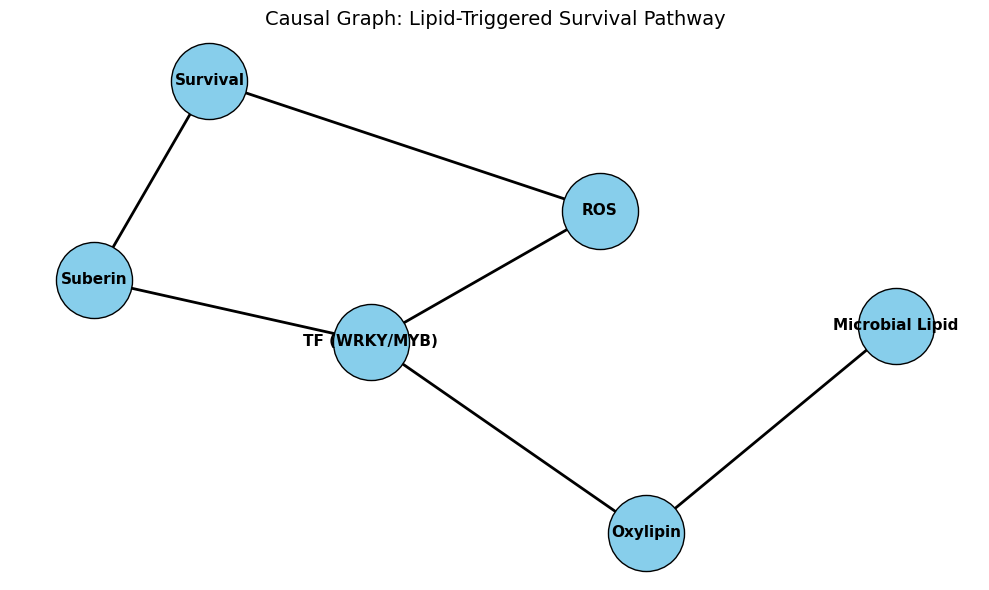

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Define edges
edges = [
    ("Microbial_Lipid", "Oxylipin"),
    ("Oxylipin", "Gene_5"),  # e.g., WRKY70
    ("Gene_5", "Suberin_Monomer"),
    ("Gene_5", "ROS_Level"),
    ("Suberin_Monomer", "Survival"),
    ("ROS_Level", "Survival")
]

# Create graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Custom node labels (clearer and shorter)
labels = {
    "Microbial_Lipid": "Microbial Lipid",
    "Oxylipin": "Oxylipin",
    "Gene_5": "TF (WRKY/MYB)",
    "Suberin_Monomer": "Suberin",
    "ROS_Level": "ROS",
    "Survival": "Survival"
}

# Better layout for readability
pos = nx.spring_layout(G, seed=42, k=1)

# Plot
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=3000, edgecolors='black')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=2)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=11, font_weight='bold')

plt.title("Causal Graph: Lipid-Triggered Survival Pathway", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
